In [1]:
import pandas as pd
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/samantha/Desktop/python/Machine Learning with Python/Assignment 2,3/train.csv")
df_test = pd.read_excel("/Users/samantha/Desktop/python/Machine Learning with Python/Assignment 2,3/test.xlsx")

In [3]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [4]:
df.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [5]:
df.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [38]:
## Replace class -1 with 0 for label column
df=df.replace('-1','0')
df

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,0,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,0,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,0,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,0,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,0,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31423,0,638420,19360259,-1,23,2569487005,2018710401,1712143179,2308170622,2967512603,...,0,0,0,0,0,0,0,773194559,3617851689,4220791646
31424,0,638422,19360260,-1,23,2569487005,403381353,2280365090,652481754,2967512603,...,0,0,0,0,0,0,0,4038791635,3617851689,4220791646
31425,0,638461,19360392,-1,23,497926344,1235983246,1379688777,652481754,2116767313,...,0,0,0,0,0,0,0,1169636883,621902171,3706004275
31426,0,638496,19360528,-1,23,2569487005,403381353,2780744710,652481754,2967512603,...,0,0,0,0,0,0,0,357042422,3617851689,4220791646


In [39]:
label = df['label'].values
df['label'].value_counts()

0    31371
1       57
Name: label, dtype: int64

In [8]:
df.dtypes

label           int64
id              int64
visitTime       int64
purchaseTime    int64
hour            int64
C1              int64
C2              int64
C3              int64
C4              int64
C5              int64
C6              int64
C7              int64
C8              int64
N1              int64
C9              int64
N2              int64
N3              int64
N4              int64
N5              int64
N6              int64
N7              int64
N8              int64
N9              int64
N10             int64
C10             int64
C11             int64
C12             int64
dtype: object

In [9]:
# change type to string
df[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]] = df[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]].astype(str)

In [10]:
##Check if there are missing values
df.isnull().sum()

label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64

In [40]:
df.dtypes
for i in df.columns:
    print ("---- %s ---"% i)
    print (df[i].value_counts())

---- label ---
0    31371
1       57
Name: label, dtype: int64
---- id ---
399357    1
159399    1
525994    1
278189    1
448176    1
         ..
68628     1
590869    1
476883    1
5143      1
327680    1
Name: id, Length: 31428, dtype: int64
---- visitTime ---
19328699    6
19319226    6
19325796    5
19314062    5
19310993    5
           ..
19310525    1
19283902    1
19314623    1
19318721    1
19300352    1
Name: visitTime, Length: 24587, dtype: int64
---- purchaseTime ---
-1           31371
 19307708        1
 19319002        1
 19306613        1
 19298361        1
 19330955        1
 19318637        1
 19324431        1
 19295049        1
 19331883        1
 19325720        1
 19344902        1
 19331996        1
 19325359        1
 19323160        1
 19327407        1
 19327835        1
 19323177        1
 19300350        1
 19344084        1
 19345863        1
 19312951        1
 19304723        1
 19335360        1
 19337379        1
 19302544        1
 19325069        1
 1

In [42]:
data = df.drop(columns=['label','id','visitTime','purchaseTime','C1','C3','C10'])
#drop C1,C3,C10 since the variables are too diversified
data

,hour,C2,C4,C5,C6,C7,C8,N1,C9,N2,N3,N4,N5,N6,N7,N8,N9,N10,C11,C12
0,0,1830830742,652481754,2967512603,3624739744,2303407174,2206061889,0,4287642944,0,0,0,0,0,0,0,0,0,3617851689,4220791646
1,0,403381353,652481754,2967512603,179712055,2303407174,157533148,1,3272771221,0,1,0,0,0,0,1,0,0,3831440054,1213938795
2,0,403381353,652481754,2967512603,1607619193,2303407174,3588031319,0,3329757940,0,0,0,0,0,0,0,0,0,2379633508,1284343215
3,0,403381353,652481754,2967512603,10212495,2303407174,3588031319,0,3427046189,0,0,0,0,0,0,0,0,0,3617851689,4220791646
4,0,403381353,652481754,2967512603,580883881,2303407174,157533148,0,2088887026,0,0,0,0,0,0,0,0,0,3617851689,4220791646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31423,23,2018710401,2308170622,2967512603,3624739744,2303407174,157533148,0,4287642944,0,0,0,0,0,0,0,0,0,3617851689,4220791646
31424,23,403381353,652481754,2967512603,3624739744,2303407174,157533148,0,4287642944,0,0,0,0,0,0,0,0,0,3617851689,4220791646
31425,23,1235983246,652481754,2116767313,2304197778,2303407174,2374954832,0,3179660634,0,0,0,0,0,0,0,0,0,621902171,3706004275
31426,23,403381353,652481754,2967512603,3624739744,2303407174,434828410,0,4287642944,0,0,0,0,0,0,0,0,0,3617851689,4220791646


          hour        N1        N2        N3        N4        N5        N6  \
hour  1.000000  0.014503 -0.020094  0.036497  0.027168  0.006560  0.014412   
N1    0.014503  1.000000  0.423092  0.083125  0.110351 -0.000232  0.052563   
N2   -0.020094  0.423092  1.000000 -0.022953  0.039056 -0.003818  0.010070   
N3    0.036497  0.083125 -0.022953  1.000000  0.349852  0.127400  0.294465   
N4    0.027168  0.110351  0.039056  0.349852  1.000000 -0.001632  0.566682   
N5    0.006560 -0.000232 -0.003818  0.127400 -0.001632  1.000000 -0.000741   
N6    0.014412  0.052563  0.010070  0.294465  0.566682 -0.000741  1.000000   
N7   -0.000202  0.028004  0.003433  0.178854  0.304263 -0.000415  0.492257   
N8    0.037086  0.125647  0.010651  0.681235  0.825176  0.102013  0.669907   
N9    0.013552  0.053844  0.006042  0.161171  0.329649  0.017159  0.373009   
N10   0.012575  0.066858  0.006845  0.210921  0.368547  0.031995  0.413678   

            N7        N8        N9       N10  
hour -0.000202  

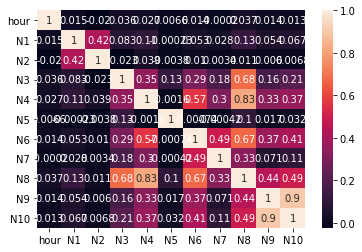

In [43]:
#check correlation between variables
corrmat = data.corr() 
print (corrmat)
sns.heatmap(corrmat, annot=True)

In [44]:
data = data.drop(columns=['N2','N5','N7','N8','N9','N10'])
#drop N8,N9 and N10 since they are highly correlated to other variables
#drop N2,N5,N7 since they have very low importance level (feature selection)

In [45]:
X=data.copy()
Y=df["label"]

In [46]:
#balance dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [47]:
Y.value_counts()

0    31371
1    31371
Name: label, dtype: int64

In [18]:
# Split the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train)
y_pred_logistic = classifier_logistic.predict(X_test)

In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB= GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB= classifier_NB.predict(X_test)

In [21]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf= classifier_rf.predict(X_test)

In [22]:
importances_rf = pd.DataFrame(classifier_rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(importances_rf)


      importance
N6      0.216298
N4      0.170327
N3      0.139851
C9      0.090914
C7      0.087044
C6      0.082356
C8      0.048167
C12     0.042681
C5      0.031829
hour    0.028348
C2      0.017374
C11     0.015988
C4      0.015246
N1      0.013577


In [23]:
## Classification Report_logistic
y_pred_logistic=classifier_logistic.predict(X_test)
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

          -1       0.75      0.76      0.75      6282
           1       0.76      0.74      0.75      6267

    accuracy                           0.75     12549
   macro avg       0.75      0.75      0.75     12549
weighted avg       0.75      0.75      0.75     12549



In [24]:
## Classification Report_NB
y_pred_NB= classifier_NB.predict(X_test)
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

          -1       0.74      0.72      0.73      6282
           1       0.73      0.75      0.74      6267

    accuracy                           0.73     12549
   macro avg       0.74      0.73      0.73     12549
weighted avg       0.74      0.73      0.73     12549



In [25]:
## Classification Report_RF
y_pred_rf= classifier_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6282
           1       1.00      1.00      1.00      6267

    accuracy                           1.00     12549
   macro avg       1.00      1.00      1.00     12549
weighted avg       1.00      1.00      1.00     12549



In [26]:
#Confusion metrics of Log Regression & Naive Bayes

from sklearn.metrics import confusion_matrix
cm_log= confusion_matrix(y_test, y_pred_logistic)
cm_NB= confusion_matrix(y_test, y_pred_NB)
cm_RF= confusion_matrix(y_test, y_pred_rf)

print(cm_log)
print(cm_NB)
print(cm_RF)

[[4778 1504]
 [1617 4650]]
[[4523 1759]
 [1568 4699]]
[[6280    2]
 [   9 6258]]


In [27]:
#plot an ROC & AUC Curve

y_pred_logistic = y_pred_logistic.astype(np.int64)
y_pred_NB = y_pred_NB.astype(np.int64)
y_pred_rf = y_pred_rf.astype(np.int64)
y_test1= y_test.astype(np.int64)

In [28]:
# calculate scores
auc_log = roc_auc_score(y_test, y_pred_logistic)
auc_NB = roc_auc_score(y_test, y_pred_NB)
auc_rf = roc_auc_score(y_test, y_pred_rf)

#summarize scores

print('Logistic Regression: AUC score =%.3f' % (auc_log))
print('Naive Bayes: AUC score =%.3f' % (auc_NB))
print('Random Forest: AUC score =%.3f' % (auc_rf))


Logistic Regression: AUC score =0.751
Naive Bayes: AUC score =0.735
Random Forest: AUC score =0.999


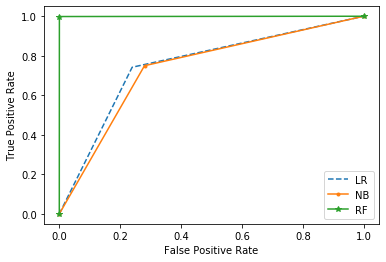

In [29]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test1, y_pred_logistic)
nb_fpr, nb_tpr, _ = roc_curve(y_test1, y_pred_NB)
rf_fpr, rf_tpr, _ = roc_curve(y_test1, y_pred_rf)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='LR')
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB')
plt.plot(rf_fpr, rf_tpr, marker='*', label='RF')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [30]:
# Random Forest has a very high AUC score, overfitting might occur
# Predict the test set with Logistic Regression Model

In [31]:
df_test.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [32]:
# Split test data into X and Y variable
Xt = df_test.drop(['label','id','visitTime','purchaseTime','C1','C3','C10','N2','N5','N7','N8','N9','N10'], axis=1)
Yt = df_test["label"]

In [33]:
# Predict probabilities on the test data set
prediction = classifier_logistic.predict_proba(Xt)
prediction

array([[0.95170782, 0.04829218],
       [0.7872449 , 0.2127551 ],
       [0.72335705, 0.27664295],
       ...,
       [0.84301612, 0.15698388],
       [0.36316914, 0.63683086],
       [0.54180827, 0.45819173]])

In [34]:
# Create data frame for predictions
prediction_frame = pd.DataFrame(prediction)
prediction_frame
new = prediction_frame.rename(columns = {0:"Not Purchase Prob",1:"Purchase Prob"})
new

,Not Purchase Prob,Purchase Prob
0,0.951708,0.048292
1,0.787245,0.212755
2,0.723357,0.276643
3,0.521190,0.478810
4,0.935606,0.064394
...,...,...
32081,0.458942,0.541058
32082,0.843016,0.156984
32083,0.843016,0.156984
32084,0.363169,0.636831


In [35]:
new.insert(0, 'id', range(1, 1 + len(new)))
new


,id,Not Purchase Prob,Purchase Prob
0,1,0.951708,0.048292
1,2,0.787245,0.212755
2,3,0.723357,0.276643
3,4,0.521190,0.478810
4,5,0.935606,0.064394
...,...,...,...
32081,32082,0.458942,0.541058
32082,32083,0.843016,0.156984
32083,32084,0.843016,0.156984
32084,32085,0.363169,0.636831


In [36]:
result = pd.concat([Xt, new], axis=1, join='inner')
table = result[['id','Purchase Prob']]
table

,id,Purchase Prob
0,1,0.048292
1,2,0.212755
2,3,0.276643
3,4,0.478810
4,5,0.064394
...,...,...
32081,32082,0.541058
32082,32083,0.156984
32083,32084,0.156984
32084,32085,0.636831


In [37]:
table.to_csv("/Users/samantha/Desktop/python/Machine Learning with Python/Assignment 2,3/e197410_Purchase_table.csv")
